In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [22]:
DATASET_DIR = 'food-101/images'  # Path to Food101 images directory
SELECTED_CLASSES = ['apple_pie', 'churros', 'hamburger', 'pizza', 'samosa']
IMG_SIZE = 100

In [23]:
calorie_map = {
    'apple_pie': 300,
    'churros': 450,
    'hamburger': 550,
    'pizza': 400,
    'samosa': 250
}

In [24]:
def extract_features(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

In [25]:
def load_data(dataset_dir, selected_classes, max_images_per_class=50):
    X, y = [], []

    for class_name in selected_classes:
        folder = os.path.join(dataset_dir, class_name)
        if not os.path.isdir(folder):
            print(f"Class folder not found: {folder}")
            continue

        images = os.listdir(folder)[:max_images_per_class]
        for img_name in images:
            img_path = os.path.join(folder, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                features = extract_features(img)
                X.append(features)
                y.append(class_name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(X), np.array(y)


In [26]:
# Load data
X, y = load_data(DATASET_DIR, SELECTED_CLASSES)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# Evaluate
print("Model Evaluation:")
print(classification_report(y_test, model.predict(X_test)))


Class folder not found: food-101/images/apple_pie
Class folder not found: food-101/images/hamburger
Class folder not found: food-101/images/pizza
Model Evaluation:
              precision    recall  f1-score   support

     churros       0.60      0.25      0.35        12
      samosa       0.40      0.75      0.52         8

    accuracy                           0.45        20
   macro avg       0.50      0.50      0.44        20
weighted avg       0.52      0.45      0.42        20



In [27]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    features = extract_features(img).reshape(1, -1)
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features).max()
    calories = calorie_map.get(prediction, "Not available")

    print(f"\n Predicted: {prediction}")
    print(f"Estimated Calories: {calories}")
    print(f"Confidence: {probability:.2f}")

    # Show image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{prediction} ({calories} cal)")
    plt.axis('off')
    plt.show()


 Predicted: churros
Estimated Calories: 450
Confidence: 0.51


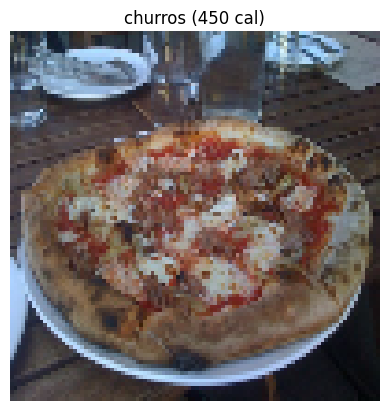

In [33]:
predict_image('food-101/images/pizza/5764.jpg')